# Project on Rainfall Machine Learning Model

# Description

**Objective or Aim is to build a machine learning model capable of predicting the possibility of rainfall prior to the dataset historical or dataset of a particular area.**

In [1]:
#import required libraries
import pandas as pd #for data processing and reading
import numpy as np #for linear algebra processing
import matplotlib.pyplot as plt #For visualization
import seaborn as sns #for visualization

In [2]:
#loading the csv file
df=pd.read_csv('ausraindata.csv')

In [3]:
#Displaying data, using df.head() or print(df[0:5])
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [4]:
#Rain Tomorrow is our Target Variable or Predicted variable
#we have Preictor variable

In [5]:
#lets know the size of the data
print('The size of the dataframe is:', df.shape)

The size of the dataframe is: (142193, 24)


In [6]:
#Checking Null Values,data preprocessing
print(df.count().sort_values())

Sunshine          74377
Evaporation       81350
Cloud3pm          85099
Cloud9am          88536
Pressure9am      128179
Pressure3pm      128212
WindDir9am       132180
WindGustDir      132863
WindGustSpeed    132923
WindDir3pm       138415
Humidity3pm      138583
Temp3pm          139467
WindSpeed3pm     139563
Humidity9am      140419
RainToday        140787
Rainfall         140787
WindSpeed9am     140845
Temp9am          141289
MinTemp          141556
MaxTemp          141871
Date             142193
Location         142193
RISK_MM          142193
RainTomorrow     142193
dtype: int64


In [7]:
#holdout = df
#holdout["Location"]

0         Albury
1         Albury
2         Albury
3         Albury
4         Albury
           ...  
142188     Uluru
142189     Uluru
142190     Uluru
142191     Uluru
142192     Uluru
Name: Location, Length: 142193, dtype: object

In [8]:
#finding % of missing values for each column
df.isnull().sum()*int(100/len(df))

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

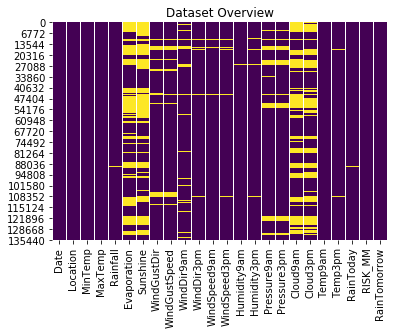

In [9]:
#To visualize missing or null values in the dataset

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(),cbar=False, cmap="viridis").set_title("Dataset Overview")
plt.show()

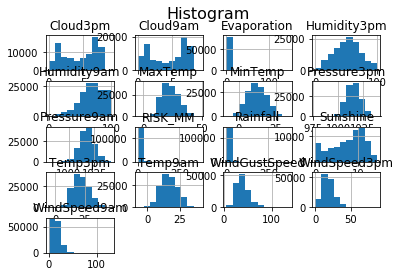

In [10]:
df.hist()
plt.suptitle("Histogram", fontsize=16)
plt.show()

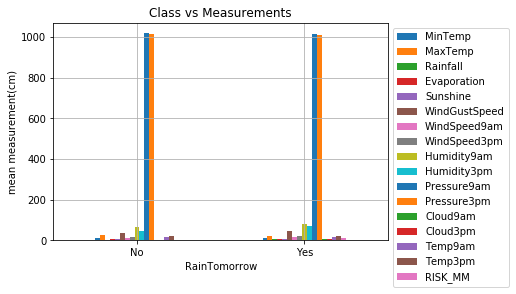

In [11]:
df.groupby(by = "RainTomorrow").mean()
df.groupby(by = "RainTomorrow").mean().plot(kind="bar")
plt.title('Class vs Measurements')
plt.ylabel('mean measurement(cm)')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

In [12]:
#let's find out if we have duplicates of values
df.duplicated().sum()

0

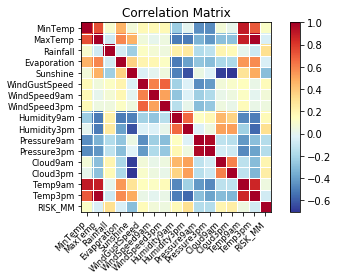

In [13]:
#let's visualize to see how the different features correlate
corr = df.corr(method='pearson')
corr
import statsmodels.api as sm

sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

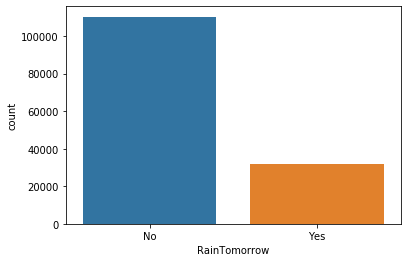

In [14]:
#Visualize the result or label data for rain tommorow
sns.countplot(x = "RainTomorrow", data = df);

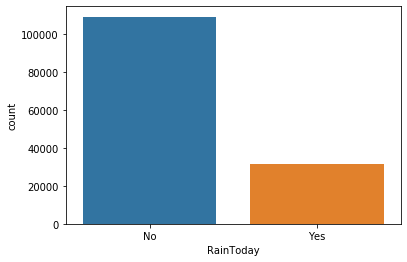

In [15]:
#Visualized result for rain today 
sns.countplot(x = "RainToday", data = df);

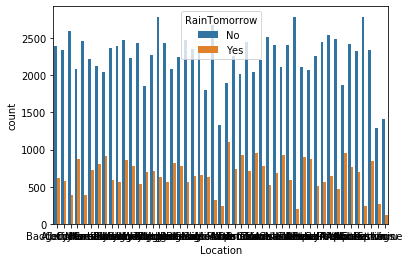

In [16]:
#let's see how the different locations relate with rain tomorrow
sns.countplot(x = "Location" , hue = "RainTomorrow", data = df);

# DATA PREPROCESSING

In [17]:
#Dealing with Missing Values


In [18]:
#Let's check the data type
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [19]:
#droping
df.drop(['Date'],axis=1,inplace= True) 

In [20]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [21]:
df['WindDir9am'].mode()[0]

'N'

In [22]:
df['WindDir3pm'].mode()[0]

'SE'

In [23]:
df['WindGustDir'].mode()[0]

'W'

In [24]:
df['Sunshine'].mode()[0]

0.0

In [25]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [26]:
df['Evaporation'].fillna(0,inplace=True)
df['Sunshine'].fillna(0,inplace=True)
df['Rainfall'].fillna(0,inplace=True)
df['WindGustSpeed'].fillna(31,inplace=True)
df['Cloud3pm'].fillna(4,inplace=True)
df['Cloud9am'].fillna(4,inplace=True)
df['WindDir9am'].fillna('N',inplace=True)
df['WindGustDir'].fillna('W',inplace=True)
df['MaxTemp'].fillna(28,inplace=True)
df['MinTemp'].fillna(16,inplace=True)
df['WindDir3pm'].fillna('SE',inplace=True)
df['WindSpeed9am'].fillna(13,inplace=True)
df['WindSpeed3pm'].fillna(19,inplace=True)
df['Humidity9am'].fillna(70,inplace=True)
df['Humidity3pm'].fillna(32,inplace=True)
df['Pressure9am'].fillna(1017,inplace=True)
df['Pressure3pm'].fillna(1015,inplace=True)
df['Temp9am'].fillna(16,inplace=True)
df['Temp3pm'].fillna(21,inplace=True)

In [27]:
#Filling the Mean, median and mode values for missing values in a specific column:
#df.fillna(df.mean(),inplace=True)
#df.fillna(df.mode(),inplace=True)
#df.fillna(df.median(),inplace=True)

In [28]:
#LET'S DEAL WITH CATEGORICAL DATA

#changing yes/no to 1/0 for RainToday and RainTomorrow. 

df['RainToday'].replace({'No':0,'Yes':1},inplace=True)
df['RainTomorrow'].replace({'No':0,'Yes':1},inplace=True)

In [29]:
#to remove any null values
df=df.dropna(how='any')

In [30]:
#the sum number of missing values in the dataset for each column

df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [31]:
rainfall=pd.pivot_table(df, values='Rainfall', columns=['Location'])
rainfall

Location,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
Rainfall,1.572185,2.255073,1.92571,0.869355,2.207925,1.68883,1.621452,3.160536,5.765317,1.735038,...,3.488603,2.15904,0.707324,1.706085,2.877329,1.847692,3.510985,2.899658,3.589127,0.489946


In [32]:
#droping
df.drop(['Location'],axis=1,inplace= True) 


C:\Users\Public\DSNanaconda\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [33]:
print(df.shape)

(140787, 22)


In [34]:
#let's convert unique value columns to int, i.e character values that are not consistent

categorical_columns=['WindGustDir','WindDir9am','WindDir3pm']
for col in categorical_columns:
    print(np.unique(df[col]))

['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


In [35]:
#NORMALIZING OUR DATA SET for all the values to be in similar range, like 

df=pd.get_dummies(df, columns=categorical_columns)
print(df.iloc[4:9])

   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
4     17.5     32.3       1.0          0.0       0.0           41.0   
5     14.6     29.7       0.2          0.0       0.0           56.0   
6     14.3     25.0       0.0          0.0       0.0           50.0   
7      7.7     26.7       0.0          0.0       0.0           35.0   
8      9.7     31.9       0.0          0.0       0.0           80.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  WindDir3pm_NNW  \
4           7.0          20.0         82.0         33.0  ...               0   
5          19.0          24.0         55.0         23.0  ...               0   
6          20.0          24.0         49.0         19.0  ...               0   
7           6.0          17.0         48.0         19.0  ...               0   
8           7.0          28.0         42.0          9.0  ...               0   

   WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  \
4          

In [36]:
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
scaler.fit(df)
df=pd.DataFrame(scaler.transform(df),index=df.index,columns=df.columns)

In [37]:
#FEATURE SELECTION OR IMPORTANCE

In [38]:
X = df.iloc[:,:-1]         #Features
y = df.iloc[:,-1]          #Target variable

In [39]:
#DATA MODELING..USING FOR MULTIPLE CLASSIFICATION

# USING LOGISTIC REGRESSION ALGORITHM

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
import time
t0=time.time()

In [43]:
#Data splicing, so here 75% of the data is used as the training data while 25% of the data is used as testing data.
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
clf_logreg=LogisticRegression(random_state=0)
clf_logreg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [44]:
Y_pred=clf_logreg.predict(X_test)
score=accuracy_score(y_test, Y_pred)

In [45]:
print('Accuracy Using Logistic Regression Algorithm is:', score)
print('Time Taken Using LR is:', time.time()-t0)

Accuracy Using Logistic Regression Algorithm is: 1.0
Time Taken Using LR is: 3.5241711139678955


In [46]:
from sklearn import metrics
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, Y_pred)*100)

Accuracy: 100.0


The accuracy of the model is $100\%$

In [47]:

cnf_matrix = metrics.confusion_matrix(y_test, Y_pred)
cnf_matrix

array([[32887,     0],
       [    0,  2310]], dtype=int64)

In [48]:
def ConfusionMatrix(y_test, Y_pred, label = ["Negative", "Positive"]):
    "A beautiful confusion matrix function to check the model performance"
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    cm = confusion_matrix(y_test, Y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot = True, cbar = False, fmt = 'd', cmap = 'winter')
    plt.xlabel('Predicted', fontsize = 13)
    plt.xticks([0.5, 1.5], label)
    plt.yticks([0.5, 1.5], label)
    plt.ylabel('Truth', fontsize = 13)
    plt.title('A confusion matrix');
    ConfusionMatrix(y_test, logistic_prediction, label= ["not-Rain-tomorrow", "Rain-tomorrow"])

# USING RANDOM FOREST CLASSIFIER ALGORITHM

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [50]:
t0=time.time() #used to calculate the time taken by the classifier

In [51]:
#Data splicing, so here 75% of the data is used as the training data while 25% of the data is used as testing data.
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.25) 
clf_rf=RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)

clf_rf.fit(X_train,y_train) #Building the model using Training data set

RandomForestClassifier(max_depth=4, random_state=0)

In [52]:
Y_pred=clf_rf.predict(X_test) #here you evaluate the model by using testing data set
score=accuracy_score(y_test, Y_pred)  #define accuuracy score

In [53]:
print('Accuracy Using Random Forest Classifier Algorithm is:', score)
print('Time Taken Using RFC is:', time.time()-t0)

Accuracy Using Random Forest Classifier Algorithm is: 0.9366991504957809
Time Taken Using RFC is: 9.223311424255371


# USING DECISION TREE CLASSIFIER ALGORITHM

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
t0=time.time()
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.25) 
clf_dt=DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [55]:
Y_pred=clf_dt.predict(X_test) #here you evaluate the model by using testing data set
score=accuracy_score(y_test, Y_pred)
print('Accuracy Using Decision Tree Classifier Algorithm is:', score)
print('Time Taken Using DT is:', time.time()-t0)

Accuracy Using Decision Tree Classifier Algorithm is: 0.9838338494758075
Time Taken Using DT is: 3.1918725967407227


# USING SUPPORT VECTOR MACHINE

In [56]:
from sklearn import svm
from sklearn.model_selection import train_test_split
t0=time.time()
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.25) 
clf_svc=svm.SVC(kernel='linear')
clf_svc.fit(X_train,y_train)

SVC(kernel='linear')

In [57]:
Y_pred=clf_svc.predict(X_test) #here you evaluate the model by using testing data set
score=accuracy_score(y_test, Y_pred)
print('Accuracy Using Support Vector Machine Algorithm is:', score)
print('Time Taken Using SVM is:', time.time()-t0)

Accuracy Using Support Vector Machine Algorithm is: 1.0
Time Taken Using SVM is: 6.75808572769165


In [58]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, Y_pred)
cnf_matrix

array([[32907,     0],
       [    0,  2290]], dtype=int64)

In [59]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 15.0, 'Predicted label')

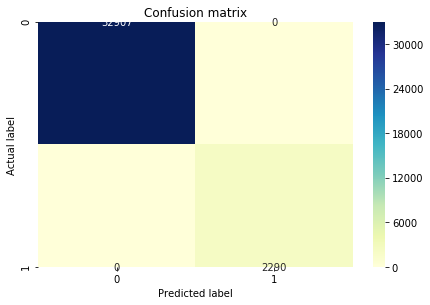

In [62]:
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Logistic Regression model and SVM model gives the best model evaluation score. worth of 100%. <br>
But between the two, SVM shows the most predicted values in terms of confussion matrix.